In [1]:
import sys
import os

# Add the path to the code directory to the system path
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath("."), '../code')))

from run import run_instance, print_results
from QAOA import circuit_plot

In [8]:
# Example Single Usage
# If more than ships than time slots are being used, more iterations will be needed as more infeasible solutions will be generated
# Currently infeasible reasons are for bug fixing purposes, 
number_ships=  8
number_time_slots = 6
NUM_READS = 10 # Number of of iterations of the simulated annealer

results = run_instance(number_ships, number_time_slots, NUM_READS)
print_results(number_ships, number_time_slots, results)

Instance with 8 ships (and 6 time slots):
  Optimized total water cost = 217.0
  Baseline total water cost   = 280
  Number of feasible solutions: 10
  Number of infeasible solutions: 0
  Tandem lockages used: 0
  Cross fills applied: 3
  Length of ships: [304.14 362.13 287.79 174.99 174.48 235.56 225.66]
  Timetable for best solution:

Timetable by Time Slot:
  Time slot 1 (Lock type: Panamax_A): Ships [6]
  Time slot 2 (Lock type: Panamax_B): Ships [4]
  Time slot 3 (Lock type: Panamax_A): Ships [5]
  Time slot 4 (Lock type: Panamax_B): Ships [3]
  Time slot 5 (Lock type: NeoPanamax): Ships [2]
  Time slot 6 (Lock type: NeoPanamax): Ships [7]

--------------------------------------------------



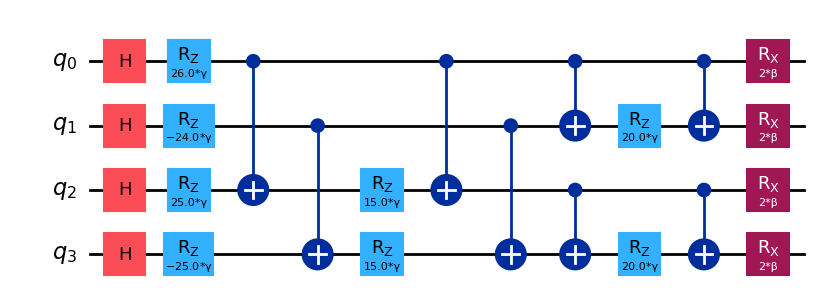

In [4]:
## Now we generate the QAOA circuit for given amount of ships and time slots
number_ships=  2
number_time_slots = 2
circuit_plot(number_ships, number_time_slots)